In [1]:
import pandas as pd
from matplotlib.lines import Line2D
from matplotlib import pyplot as plt
from utils import setup_plotting_standards, basic_formatting

setup_plotting_standards()
COLOR = '#343434'

color_map = {
    "Zambia" : "#009E73", # green
    "Mozambique" : "#56B4E9", # blue
    "Nigeria" : "#0072B2",  # reddish-purple
    "Cameroon" : "#D55E00", # brown 
    "Democratic Republic of the Congo" : COLOR, #Black
    "Uganda" : "#F0E442",
    "Malawi" : "#E69F00", # orange
    "Other" : "#C8C8C8" # grey
}

# Figure 1
CholGEN generated a large number of genomes from Africa. Here we plot the contribution in terms of genomes per year and compare our sampling to the reported Cholera cases in each of the CholGEN Member States.

First, we load the annual number of cholera cases in each of the CholGEN Member States. These were collected from https://cholera-taxonomy.middle-distance.com/

In [2]:
cc = {
    "NGA" : "Nigeria",
    "CMR" : "Cameroon",
    "MOZ" : "Mozambique",
    "COD" : "Democratic Republic of the Congo",
    "MWI" : "Malawi",
    "ZMB" : "Zambia",
    "UGA" : "Uganda"
}

cases = pd.read_csv( "../data/suspected_cases.csv", parse_dates=["TL"], usecols=["Location", "TL", "deaths", "sCh"] )
cases["year"] = cases["TL"].dt.year
cases["Location"] = cases["Location"].str.slice( 5 ).map( cc )
cases.head()

,Location,TL,deaths,sCh,year
0,Cameroon,1971-01-01,336.0,2167,1971
1,Cameroon,1972-01-01,27.0,362,1972
2,Cameroon,1973-01-01,16.0,206,1973
3,Cameroon,1974-01-01,16.0,83,1974
4,Cameroon,1975-01-01,0.0,3,1975


Next, we load the metadata for all publicly available cholera sequences and calculate the number of genomes generated each year.

In [3]:
public = pd.read_csv( "../data/supplemental_data2.csv", parse_dates=["collection_date"], usecols=["taxa", "country", "collection_date"] )
public = public.loc[public["country"].notna()&(public["country"]!="?")]
public["collection_year"] = public["collection_date"].dt.year
counts = public.pivot_table( index="collection_year", columns="country", values="collection_date", aggfunc="count", fill_value=0 )
counts.head()

country,Afghanistan,Albania,Algeria,Angola,Argentina,Bahrain,Bangladesh,Benin,Bolivia,Brazil,...,Thailand,Togo,Tunisia,Turkey,Uganda,Ukraine,Viet Nam,Yemen,Zambia,Zimbabwe
collection_year,,,,,,,,,,,,,,,,,,,,,
1957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1962,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1963,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1964,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Next, we load the metadata for the sequences generated by CholGEN and calculate the number of genomes generated each year.

In [4]:
cg = pd.read_csv( "../data/supplemental_data1.csv", parse_dates=["collection_date"], usecols=["taxa", "country", "collection_date"])
cg["collection_year"] = cg["collection_date"].dt.year
total_counts_cg = cg["country"].value_counts()
counts_cg = cg.pivot_table( index="collection_year", columns="country", values="collection_date", aggfunc="count", fill_value=0 )

counts_cg

country,Cameroon,Democratic Republic of the Congo,Malawi,Mozambique,Nigeria,Uganda,Zambia
collection_year,,,,,,,
2018.0,0,0,0,0,33,1,0
2019.0,0,0,0,0,24,6,0
2020.0,1,0,0,0,0,16,0
2021.0,0,30,0,0,21,0,0
2022.0,0,77,41,0,31,0,0
2023.0,30,78,29,37,0,16,80
2024.0,0,33,0,0,23,9,157


Finally, we plot a barplot of the cases 

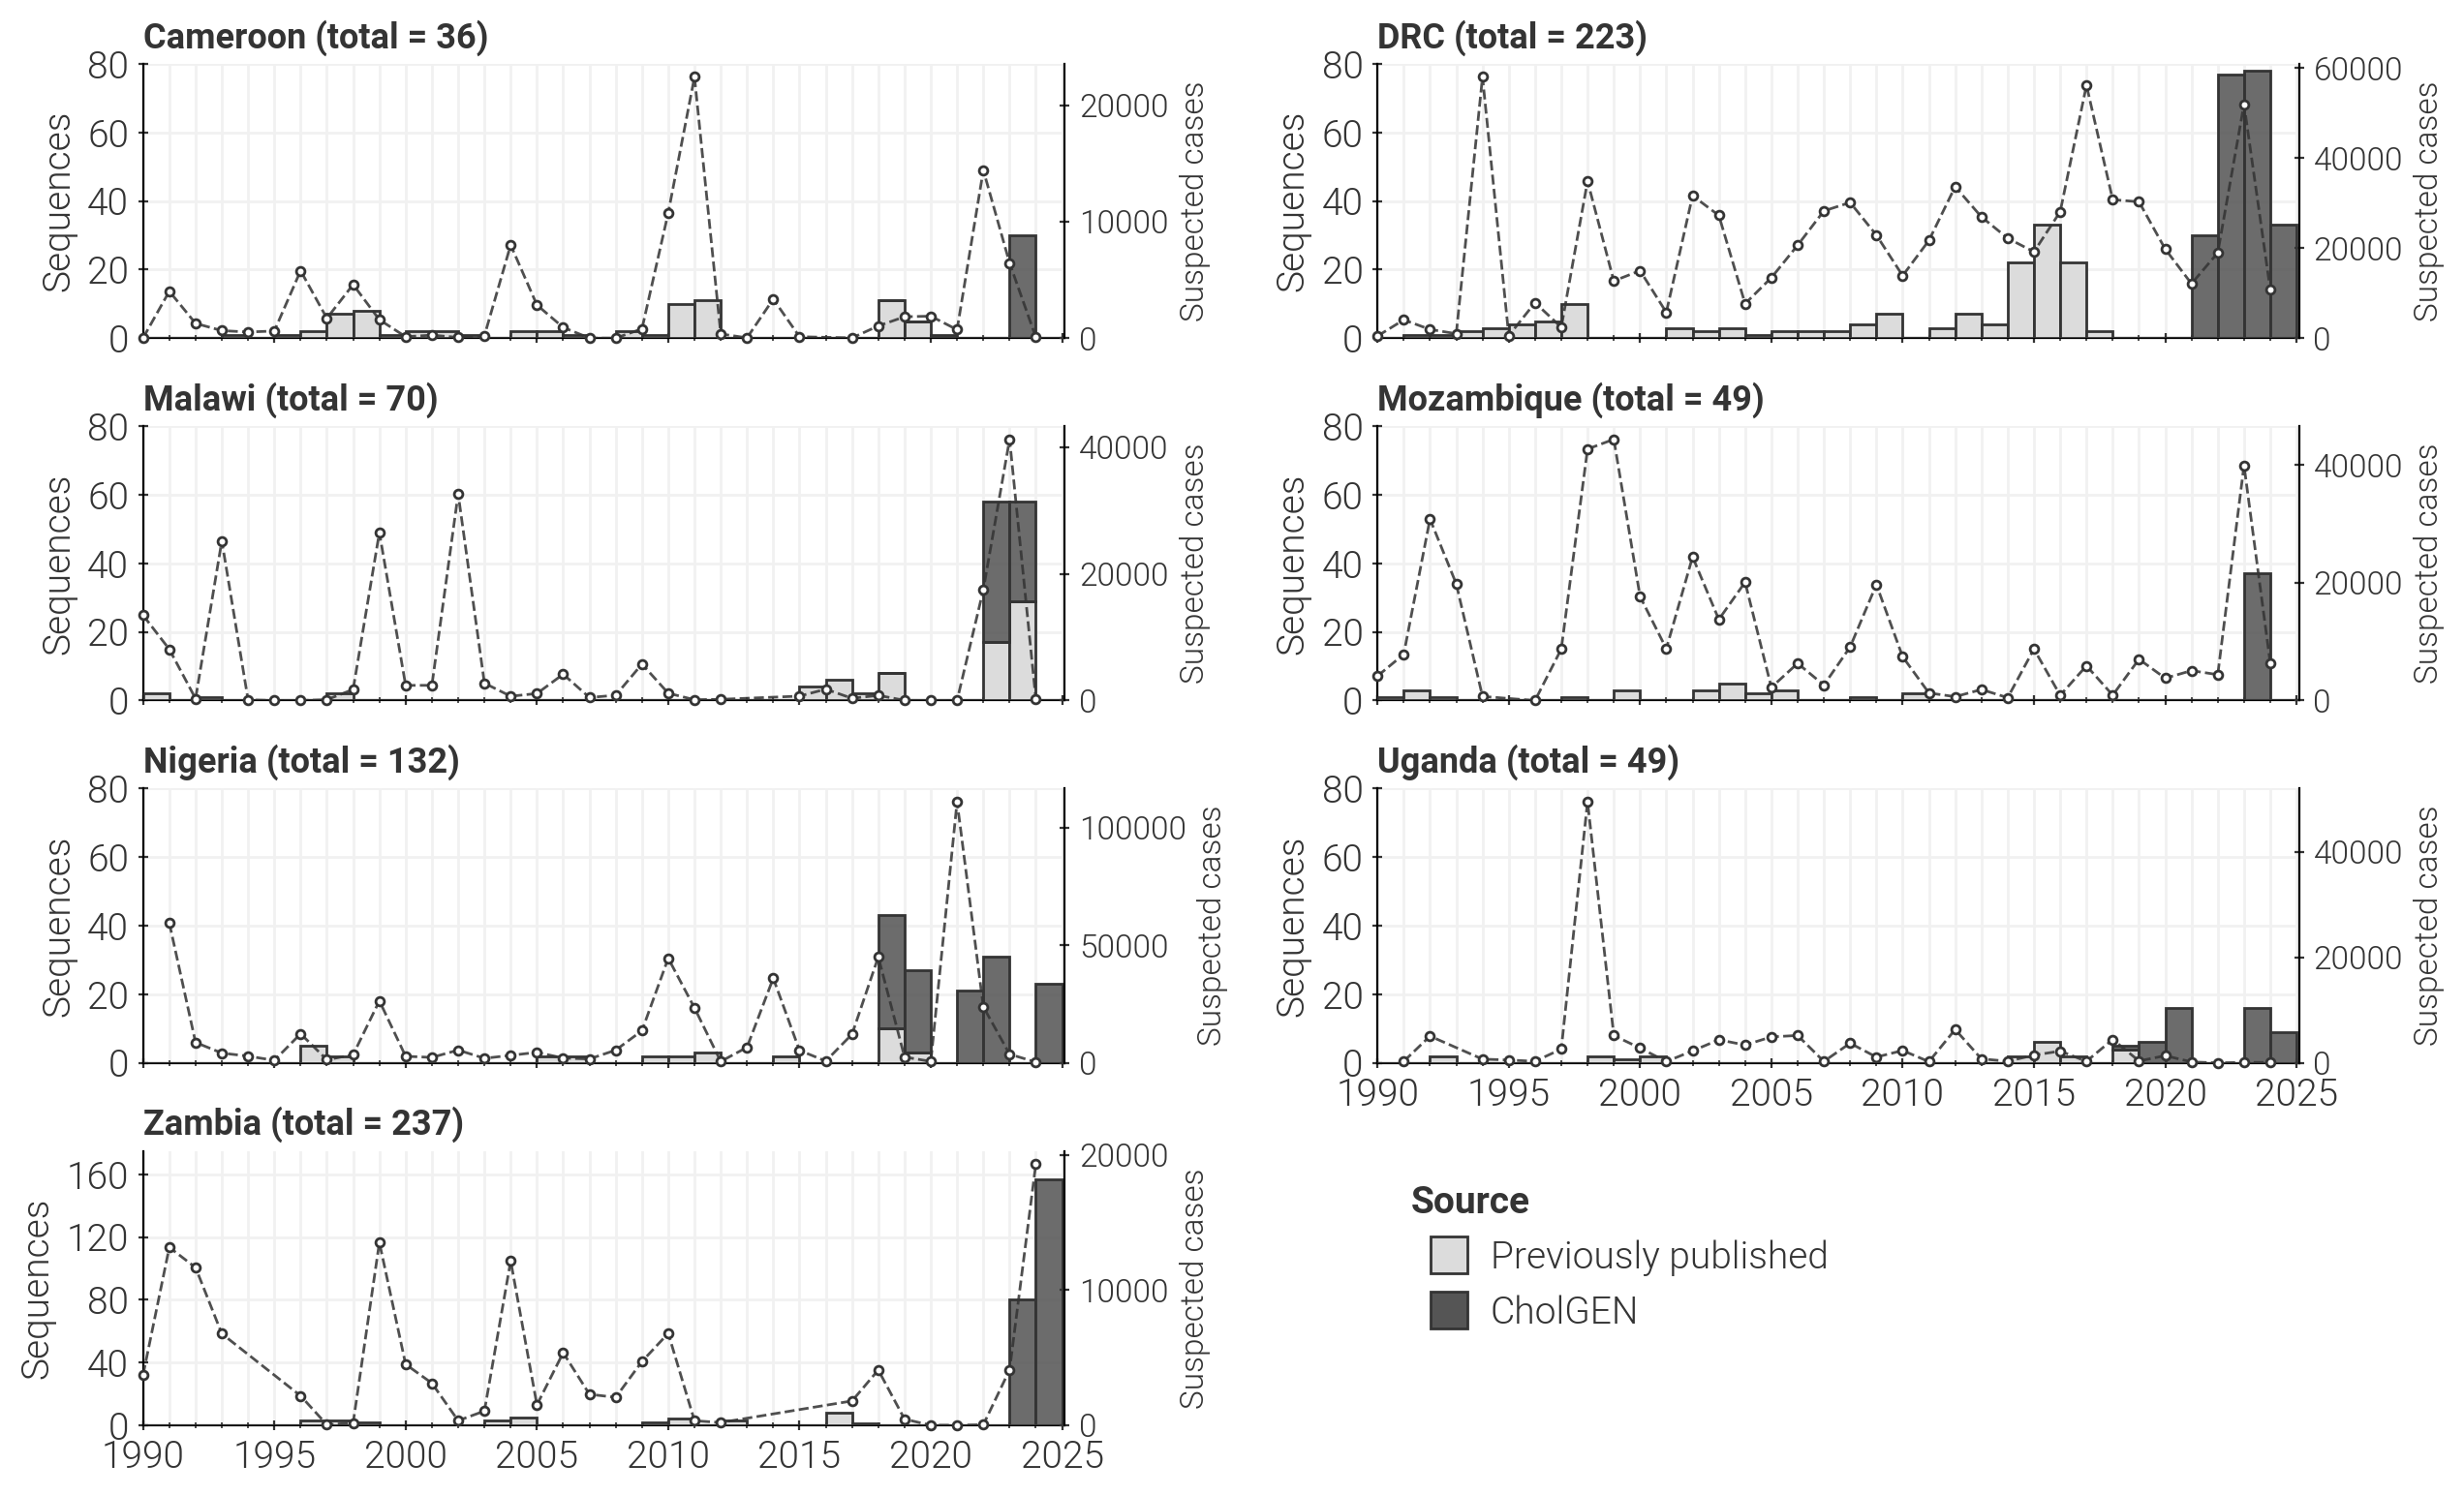

In [5]:
countries = ["Cameroon", "Democratic Republic of the Congo", "Malawi", "Mozambique", "Nigeria", "Uganda", "Zambia"]

fig, axes = plt.subplots( ncols = 2, nrows=4, figsize=(13,8) )

axes = axes.flatten()
for ax, country in zip( axes, countries ):
    ax.bar( counts.index, counts[country], width=1, align="center", color="gainsboro", zorder=10, linewidth=1, edgecolor=COLOR )
    bottom = list()
    for year in counts_cg.index:
        if year in counts[country].index:
            bottom.append( counts[country][year] )
        else:
            bottom.append( 0 )
    ax.bar( counts_cg.index, counts_cg[country], bottom=bottom, width=1, align="center", color="#555555DD", zorder=11, linewidth=1, edgecolor=COLOR )

    ax2 = ax.twinx()
    tmp = cases.loc[(cases["Location"]==country)&(cases["year"]>=1990)]
    #ax2.plot( "year", "sCh", data=tmp, linestyle="dotted", linewidth=1, color="white", zorder=11 )
    ax2.plot( "year", "sCh", data=tmp, linestyle="dashed", linewidth=1, color=COLOR+ "DD", zorder=10 )
    spots = ax2.scatter( "year", "sCh", data=tmp, color="white", edgecolor=COLOR, linewidth=1, s=10, zorder=11 )
    spots.set_clip_on( False )

    ax.set_xticks( range(1990,2025), minor=True )
    ax.set_xticks( range( 1990, 2030, 5 ), minor=False )
    #ax.set_xticklabels( range( 1990, 2025, 5 ) )
    
    
    basic_formatting( ax, which="both", xlims=(1989.4,2024.6), ylims=(0,175 if country == "Zambia" else 80), ylabel="Sequences", xsize=14, ysize=14 )
    ax.tick_params( axis="x", labelbottom=country in ["Zambia", "Uganda"] )
    ax.set_title( f"{country.replace( 'Democratic Republic of the Congo', 'DRC')} (total = {total_counts_cg[country]})", fontsize=13, fontweight="bold", loc="left" )
    ax.set_yticks( [0,20,40,60,80] if country != "Zambia" else [0,40,80,120,160])
    
    [ax2.spines[j].set_visible( False ) for j in ax2.spines if j not in ["right"]]
    ax2.tick_params( axis="y", which="both", direction="inout", labelleft=False, labelright=True, labelsize=12 )
    ax2.set_ylabel( "Suspected cases", fontsize=12 )
    ax2.set_ylim(0)
    
    #ax.label_outer()

legend1 = [
    Line2D([0], [0], linestyle='none', marker='s', color="gainsboro", markeredgecolor=COLOR, markeredgewidth=1, label="Previously published", markersize=14 ),
	Line2D([0], [0], linestyle='none', marker='s', color="#555555", markeredgecolor=COLOR, markeredgewidth=1, label="CholGEN", markersize=14 )
]

legend1 = axes[-1].legend( handles=legend1, title="Source", loc="upper left", alignment="left", frameon=False, fontsize=14, handletextpad=0.1, title_fontproperties={ "size" : 14, "weight" : "bold" } ) 

[axes[-1].spines[j].set_visible( False ) for j in axes[-1].spines]
axes[-1].set_yticks([])
axes[-1].set_xticks([])

plt.tight_layout(h_pad=0.5)
plt.savefig( "plots/figure1-sequences-cases-over-time.pdf" )
plt.show()
    